(EJUCOINTCIECOPI)=

# 3.3 Ejemplos de problemas UCO, introducción a *Constrained Inequality and Equality Optimization* (CIEO) y puntos interiores

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga1](https://www.dropbox.com/s/6isby5h1e5f2yzs/4.2.Problemas_de_optimizacion_convexa.pdf?dl=0), [liga2](https://drive.google.com/file/d/1zCIHNAxe5Shc36Qo0XjehHgwrafKSJ_t/view), [liga3](https://drive.google.com/file/d/1oulU1QAKyLyYrkpJBLSPlbWnKFCWpllX/view), [liga4](https://drive.google.com/file/d/1RMwUXEN_SOHKue-J9Cx3Ldvj9bejLjiM/view).

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Relacionará las definiciones revisadas en la nota sobre {ref}`definición de problemas de optimización, conjuntos y funciones convexas <DPOCFC>` y los algoritmos en {ref}`algoritmos de descenso y búsqueda de línea en UCO <ADBLUCO>` con modelos ampliamente utilizados en *Machine Learning*.

* Aprenderá las condiciones que puntos óptimos en un problema estándar de optimización general deben satisfacer, *aka* condiciones de Karush-Kuhn-Tucker de optimalidad, en una forma introductoria y la definición de la función Lagrangiana.

* Aprenderá una idea general sobre los métodos de puntos interiores, en específico los de la clase primal-dual para resolver problemas de programación lineal. 

```

## Mínimos cuadrados

Obsérvese que hay una gran cantidad de modelos por mínimos cuadrados, por ejemplo:

* [Lineales](https://en.wikipedia.org/wiki/Linear_least_squares) u [ordinarios](https://en.wikipedia.org/wiki/Ordinary_least_squares) (nombre más usado en Estadística y Econometría).

* [Generalizados](https://en.wikipedia.org/wiki/Generalized_least_squares), [ponderados](https://en.wikipedia.org/wiki/Weighted_least_squares).

* [No lineales](https://en.wikipedia.org/wiki/Non-linear_least_squares).

* [Totales](https://en.wikipedia.org/wiki/Total_least_squares) y [parciales](https://en.wikipedia.org/wiki/Partial_least_squares_regression).

* [No negativos](https://en.wikipedia.org/wiki/Non-negative_least_squares).

* [Rango reducido](https://epubs.siam.org/doi/abs/10.1137/1.9780898718867.ch7).


## Mínimos cuadrados lineales

Se **asume** en esta sección que $A \in \mathbb{R}^{m \times n}$ con $m \geq n$ (más renglones que columnas en $A$).


Cada uno de los modelos anteriores tienen diversas aplicaciones y propósitos. Los lineales son un caso particular del problema más general de **aproximación por normas**:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||$$

donde: $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$ son datos del problema, $x \in \mathbb{R}^n$ es la variable de optimización y $|| \cdot||$ es una norma en $\mathbb{R}^m$. 



```{admonition} Definiciones

$x^* = \text{argmin}_{x \in \mathbb{R}^n} ||Ax-b||$ se le nombra **solución aproximada** de $Ax \approx b$ en la norma $|| \cdot ||$.

El vector: $r(x) = Ax -b$ se le nombra **residual** del problema.

```

```{admonition} Comentario

El problema de aproximación por normas también se le nombra **problema de regresión**. En este contexto, las componentes de $x$ son nombradas variables regresoras, las columnas de $A$, $a_j$, es un vector de *features* o atributos y el vector $\displaystyle \sum_{j=1}^n x_j^*a_j$ con $x^*$ óptimo del problema es nombrado la **regresión de $b$ sobre las regresoras**, $b$ es la **respuesta.**

```

Si en el problema de aproximación de normas anterior se utiliza la norma Euclidiana o norma $2$, $|| \cdot ||_2$, y se eleva al cuadrado la función objetivo se tiene:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||^2_2$$

que es el modelo por mínimos cuadrados lineales cuyo objetivo es minimizar la suma de cuadrados de las componentes del residual $r(x)$.


**A partir de aquí, la variable de optimización será $\beta$ y no $x$** de modo que el problema es:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2$$


Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: 

$$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ 


sea lo "más pequeña posible", esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima. Por ejemplo:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


```{admonition} Observación
:class: tip

La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

```

### Modelo en mínimos cuadrados lineales

En los mínimos cuadrados lineales se asume un modelo:  

$$f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$$

con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste. Con las funciones $\phi_j (\cdot)$ se construye a la matriz $A$.

```{admonition} Observación
:class: tip

Si $n=m$ entonces se tiene un problema de interpolación.
```

### Enfoque geométrico y algebraico para resolver el problema de mínimos cuadrados

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de **mínimos cuadrados lineales** se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/a6pjx0pdqa3cp60/mc_beta.png?dl=0" heigth="400" width="400">


En el dibujo anterior:

* $r(\beta) = y-A\beta$,

* el vector $y \in \mathbb{R}^m$ contiene las entradas $y_i$'s,

* la matriz $A \in \mathbb{R}^{m \times n}$ contiene a las entradas $x_i$'s o funciones de éstas $\forall i=0,1,\dots,m$.

Por el dibujo se tiene que cumplir que $A^Tr(\beta)=0$, esto es: las columnas de $A$ son ortogonales a $r(\beta)$. La condición anterior conduce a las **ecuaciones normales**: 

$$0=A^Tr(\beta)=A^T(y-A\beta)=A^Ty-A^TA\beta.$$

donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^{n+1},
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^{m + 1}
$$

Finalmente, considerando la variable de optimización $\beta$ y al vector $y$ tenemos: $A^TA \beta = A^Ty$.

```{admonition} Comentario

Si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) una opción para resolver el sistema anterior es calculando la factorización $QR$ de $A$: $A = QR$ y entonces: 


$$A^TA\beta = A^Ty$$. 


Dado que $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n+1$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el **sistema de ecuaciones lineales** por resolver:

$$R\beta = Q^Ty$$
```

### Enfoque utilizando directamente la función objetivo del problema de optimización

La función objetivo en los mínimos cuadrados lineales puede escribirse de las siguientes formas:



$$
\begin{eqnarray}
f_o(x_i|\beta)=\displaystyle \sum_{i=1}^{m} (y_i -f_o(x_i|\beta))^2 &=&  \displaystyle \sum_{i=1}^{m} (y_i - A[i,:]^T\beta)^2 \\
&=& ||y - A \beta||_2^2 \\
&=& (y-A\beta)^T(y-A\beta) \\
&=& y^Ty-2\beta^TA^Ty + \beta^TA^TA\beta
\end{eqnarray}
$$

con $A[i,:]$ $i$-ésimo renglón de $A$ visto como un vector en $\mathbb{R}^n$. Es común dividir por $2$ la función objetivo para finalmente tener el problema:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} \frac{1}{2}\beta^TA^TA\beta - \beta^TA^Ty + \frac{1}{2}y^Ty.$$


```{admonition} Observación
:class: tip

En cualquier reescritura de la función $f_o$, el problema de aproximación con normas, o bien en su caso particular de mínimos cuadrados, es un problema de **optimización convexa**.

```

### Ejemplo

Planteamos un modelo del tipo: $f_o(x_i | \beta) = \beta_0\phi_0(x) + \beta_1 \phi_1(x) = \beta_0 + \beta_1 x$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint

In [2]:
np.set_printoptions(precision=2, suppress=True)

In [3]:
np.random.seed(1989) #for reproducibility
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

**Los datos ejemplo**

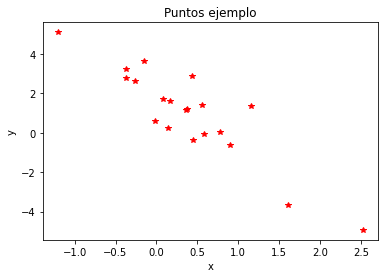

In [4]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

Utilizamos el paquete [cvxpy](https://github.com/cvxgrp/cvxpy) para resolver el problema de mínimos cuadrados:

In [5]:
import cvxpy as cp

```{margin}

Construimos a la matriz $A$.

```

In [6]:
A=np.ones((mpoints,2)) #step 1 to build matrix A
A[:,1] = x #step 2 to build matrix A

```{margin}

Definición de variables y función objetivo: $\frac{1}{2}\beta^TA^TA\beta - \beta^TA^Ty + \frac{1}{2}y^Ty$.

```

In [7]:
n = 2 # number of variables
beta = cp.Variable(n) #optimization variable
fo_cvxpy = (1/2)*cp.quad_form(beta, A.T@A) - cp.sum(cp.multiply(A.T@y, beta)) + 1/2*y.dot(y) #objective function

In [8]:
prob = cp.Problem(cp.Minimize(fo_cvxpy))
print(prob.solve())

10.217738419387963


In [9]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta.value)
print("The norm of the residual is ", cp.norm(A @ beta - y, p=2).value) #also works: cp.norm2(A @ beta - y).value



The optimal value is 10.217738419387963
The optimal beta is
[ 2.03 -2.65]
The norm of the residual is  4.520561562325624


El paquete *CVXPY* ya tiene una función para resolver el problema anterior, ver [least_squares](https://www.cvxpy.org/examples/basic/least_squares.html).

In [10]:
fo_cvxpy = 1/2*cp.sum_squares(A@beta -y)

In [11]:
prob = cp.Problem(cp.Minimize(fo_cvxpy))
print(prob.solve())

10.217738419387944


In [12]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta.value)
print("The norm of the residual is ", cp.norm(A @ beta - y, p=2).value) #also works: cp.norm2(A @ beta - y).value



The optimal value is 10.217738419387944
The optimal beta is
[ 2.03 -2.65]
The norm of the residual is  4.520561562325624


Entonces el vector $\beta$ ajustado es: $\hat{\beta_0} \approx 2.03, \hat{\beta_1} \approx -2.65$ y por tanto el modelo es:

$$f(x|\hat{\beta}) = 2.03 -2.65 x$$

In [13]:
y_hat_numpy = beta.value[0] + beta.value[1] * x

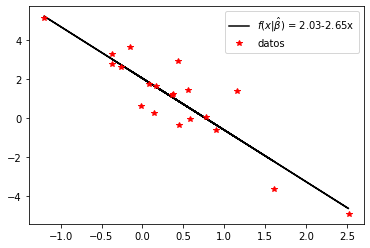

In [14]:
plt.plot(x, y_hat_numpy, "k-",
         x, y, "r*")
plt.legend(["$f(x|\\hat{\\beta})$ = 2.03-2.65x","datos"], loc="best")
plt.show()



## El problema de clasificación en dos clases $\mathcal{C}_0, \mathcal{C}_1$ 

Sean $\mathcal{C}_0 , \mathcal{C}_1$ dos clases ajenas y $x \in \mathbb{R}^n$. El problema de clasificación consiste en clasificar al vector $x$ en alguna de las dos clases anteriores de modo que se minimice el error de clasificación.


Ejemplos de lo anterior los encontramos en medicina (persona enferma o no dada una serie de mediciones en sangre), finanzas (persona sujeta a un crédito bancario o no dado un historial crediticio) o clasificación de textos (*spam* o no *spam*).


## Regresión logística: clasificación en $\mathcal{C}_0, \mathcal{C}_1$ 

El modelo por regresión logística tiene por objetivo **modelar las probabilidades de pertenencia a cada una de las clases** $\mathcal{C}_0, \mathcal{C}_1$ dado el vector de *features* o atributos $x \in \mathbb{R}^n$: $p(\mathcal{C}_0|x) , p(\mathcal{C}_1|x)$.

En la regresión logística se utiliza la función **[sigmoide](https://en.wikipedia.org/wiki/Sigmoid_function)** $\sigma:\mathbb{R} \rightarrow \mathbb{R}$:

$$\sigma(t)=\frac{1}{1+\exp(-t)}$$

para modelar ambas probabilidades ya que mapea todo el eje real al intervalo $[0,1]$. Además resulta ser una aproximación continua y diferenciable a la función de **[Heaviside](https://en.wikipedia.org/wiki/Heaviside_step_function)** $H:\mathbb{R} \rightarrow \mathbb{R}$

$$H(t) = 
\begin{cases}
1 & \text{si } t \geq 0,\\
0 & \text{si } t <0\\
\end{cases}
$$



In [15]:
mpoints = 100
t = np.linspace(-10, 10, mpoints)
Heaviside = 1*(t>0)

In [16]:
import matplotlib.pyplot as plt

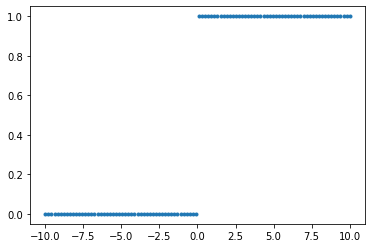

In [17]:
plt.plot(t, Heaviside, '.')
plt.show()

A continuación graficamos a la sigmoide $\sigma(ht)$ para distintos valores de $h \in \{-3, -1, -1/2, 1/2, 1, 3\}$:

In [18]:
sigmoid = lambda t_value: 1/(1+np.exp(-t_value))

In [19]:
h = np.array([-3, -1, -1/2, 1/2, 1, 3])
n = len(h)
sigmoids = np.zeros((mpoints, n))
for i in range(len(h)):
    sigmoids[:,i] = sigmoid(h[i]*t)

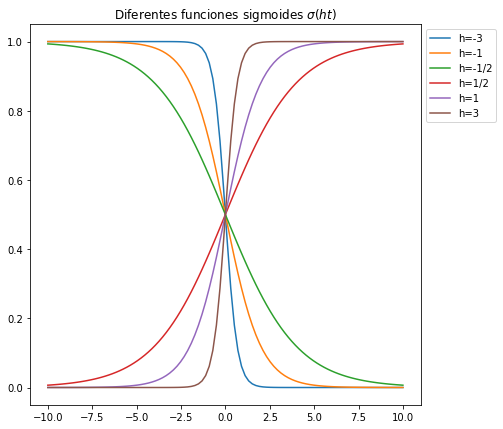

In [20]:
plt.figure(figsize=(7,7))
plt.plot(t, sigmoids[:,0],
         t, sigmoids[:,1],
         t, sigmoids[:,2],
         t, sigmoids[:,3],
         t, sigmoids[:,4],
         t, sigmoids[:,5])
l = ["h=-3", "h=-1", "h=-1/2", "h=1/2", "h=1", "h=3"]
plt.legend(l, bbox_to_anchor=(1,1))
plt.title("Diferentes funciones sigmoides $\sigma(ht)$")
plt.show()

Obsérvese la forma de cada curva al variar $h$ en la función $\sigma(ht)$. Una regla de clasificación podría ser clasificar como perteneciente a $\mathcal{C}_0$ si la probabilidad (modelada por la curva sigmoide) es menor a $0.25$ (**punto de corte**) y perteneciente a $\mathcal{C}_1$ si es mayor o igual a $0.25$. Para diferentes curvas sigmoides presentadas en la gráfica anterior obsérvese que al fijar el punto de corte y tomar un valor de $t$ en el eje horizontal, la pertenencia a alguna de las clases es menos sensible al variar $t$ que en otras curvas.



Así, la función sigmoide permite modelar la probabilidad de pertenencia a la clase $\mathcal{C}_1:$

$$p(\mathcal{C}_1| x)=\sigma(a)$$

para alguna $a \in \mathbb{R}$.

Con el [teorema de Bayes](https://en.wikipedia.org/wiki/Bayes%27_theorem) se obtiene el valor de $a$:

$$
\begin{eqnarray}
p(\mathcal{C}_1|x) &=& \frac{p(x|\mathcal{C}_1)p(\mathcal{C}_1)}{p(x|\mathcal{C}_0)p(\mathcal{C}_0)+p(x|\mathcal{C}_1)p(\mathcal{C}_1)} \nonumber \\
&=& \left ( 1+ \frac{p(x|\mathcal{C}_0)p(\mathcal{C}_0)}{p(x|\mathcal{C}_1)p(\mathcal{C}_1)} \right )^{-1} \nonumber
\end{eqnarray}
$$

Por lo tanto:

$$
\begin{eqnarray}
a(x)&=&\log\left( \frac{p(x|\mathcal{C}_1)p(\mathcal{C}_1)}{p(x|\mathcal{C}_0)p(\mathcal{C}_0)} \right ) \nonumber
\end{eqnarray}
$$

```{admonition} Comentarios

* Algunas propiedades que tiene la función $\sigma(\cdot)$ se encuentran:

$$
\begin{eqnarray}
\sigma (-t)&=&1-\sigma (t) \nonumber \\
\frac{d\sigma (t)}{dt}&=&\sigma (t)(1-\sigma (t)) \nonumber
\end{eqnarray}
$$

* En Estadística a la función:

$$a=\log\left(\frac{\sigma}{1-\sigma}\right)$$

se le conoce como [**logit**](https://en.wikipedia.org/wiki/Logit) y modela el log momio:

$$\log \left(\frac{p(\mathcal{C}_1|x)}{p(\mathcal{C}_0|x)}\right)=\log \left(\frac{p(\mathcal{C}_1|x)}{1-p(\mathcal{C}_1|x)}\right)$$

que tiene una interpretación directa en términos de las probabilidades de pertenencia a cada clase $\mathcal{C}_0,\mathcal{C}_1$.

```

### Modelo en regresión logística de dos clases

De forma similar como en el modelo por mínimos cuadrados lineales se modeló a la variable respuesta $y$ con una función lineal en sus parámetros, en el modelo en regresión logística **con dos clases e intercepto** se propone una **función lineal** en un vector de parámetros $(\beta_0,\beta) \in \mathbb{R}^{n+1}$ definida por el logit:

$$
\beta^T x+\beta_0=a(x|\beta_0,\beta)=\log \left(\frac{p(\mathcal{C}_1|x)}{p(\mathcal{C}_0|x)}\right).
$$


Obsérvese que si $y$ es considerada como variable respuesta que está en función de $x \in \mathbb{R}^{n+1}$ dado el vector $(\beta_0, \beta)$ se tiene:


$$p(\mathcal{C}_1 | x ) = y(x | \beta_0, \beta) = \frac{1}{1+ e^{-(\beta_0, \beta)^T x}}$$

que se lee "la probabilidad de pertenencia a la clase $\mathcal{C}_1$ dado el vector de atributos $x$ es igual a $y$".


```{admonition} Comentarios


* El modelo con $2$ parámetros $\beta_0, \beta_1$ se ve como:

$$p(\mathcal{C}_1 | x ) = y(x | \beta_0, \beta) = \frac{1}{1+ e^{-(\beta_0 + \beta_1x)}}$$


con $x \in \mathbb{R}$.

* El modelo puede extenderse utilizando $n+1$ funciones conocidas $\phi_j:\mathbb{R} \rightarrow \mathbb{R}$, $\phi_j(x)$ $j=0,\dots, n$ por lo que si $\phi(x)=(\phi_0(x),\phi_1(x),\dots,\phi_n(x))^T$ y $\beta_0 \in \mathbb{R}$, $\beta \in \mathbb{R}^n$, entonces se tiene el modelo por regresión logística:

$$
p(\mathcal{C}_1|\phi(x))=y(x|\beta_0, \beta)= \frac{1}{1+ e^{-(\beta_0, \beta)^T \phi(x)}}
$$

* La notación $y(x | \beta_0, \beta)$ se utiliza para denotar que $(\beta_0, \beta)$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots, \beta_n$, esto es: $n+1$ parámetros a estimar.

* La variable de optimización es $(\beta_0, \beta) \in \mathbb{R}^{n+1}$.

```

### ¿Cómo se ajustan los parámetros del modelo por regresión logística de dos clases?

Dados $(x_0,\hat{y}_0), \dots (x_m, \hat{y}_m)$ puntos se desean modelar $m+1$ probabilidades de pertenencias a las clases $\mathcal{C}_0, \mathcal{C}_1$ representadas con las etiquetas  $\hat{y}_i \in \{0,1\} \forall i=0,1,\dots, m$. El número $0$ representa a la clase $\mathcal{C}_0$ y el $1$ a la clase $\mathcal{C}_1$. El vector $x_i \in \mathbb{R}^n$ .

Cada probabilidad se modela como $y_0=y_0(x_0|\beta_0, \beta),y_1=y_1(x_1|\beta_0, \beta),\dots,y_m=y_m(x_n|\beta_0, \beta)$ utilizando:

$$p(\mathcal{C}_1|x_i) = y_i(x_i|\beta_0,\beta)  = \frac{1}{1+ e^{-(\beta_0 + \beta^T x_i)}} \forall i=0,1,\dots,m.$$


Los $n+1$ parámetros $\beta_0, \beta_1, \dots, \beta_n$ se ajustan **maximizando** la [función de verosimilitud](https://en.wikipedia.org/wiki/Likelihood_function):

$$
\mathcal{L}(\beta_0, \beta|x)=\displaystyle \prod_{i=0}^n y_i^{\hat{y}_i}(1-y_i)^{1-\hat{y}_i}
$$

donde: $\hat{y}_i \sim \text{Bernoulli}(y_i)$ y por tanto $\hat{y}_i \in \{0,1\}$: $\hat{y}_i = 1$ con probabilidad $y_i$ y $\hat{y}_i = 0$ con probabilidad $1-y_i$. Entonces se tiene el problema:



$$\displaystyle \max_{(\beta_0, \beta) \in \mathbb{R}^{n+1}} \mathcal{L}(\beta_0, \beta|x)=\displaystyle \prod_{i=0}^n y_i^{\hat{y}_i}(1-y_i)^{1-\hat{y}_i}$$

Lo anterior es equivalente a maximizar la **log-verosimilitud**:

$$
\begin{eqnarray}
\ell(\beta_0, \beta |x)&=&\log(\mathcal{L}(\beta_0, \beta| x)) \nonumber\\
&=&\displaystyle \sum_{i=1}^m \hat{y}_i\log(y_i)+(1-\hat{y}_i)\log(1-y_i) \nonumber\\
&=&\displaystyle \sum_{i=1}^m\hat{y}_i (\beta_0, \beta)^T x_i-\log(1+\exp((\beta_0, \beta)^Tx_i) \nonumber
\end{eqnarray}
$$

o a minimizar la [**devianza**](https://en.wikipedia.org/wiki/Deviance_(statistics)):


$$
\begin{eqnarray}
\displaystyle \min_{(\beta_0, \beta) \in \mathbb{R}^{n+1}}\mathcal{D}(\beta_0, \beta|x)&=&-2\ell(\beta_0, \beta|x) \nonumber \\
&=&2\displaystyle \sum_{i=1}^m\log(1+\exp((\beta_0, \beta)^Tx_i))-\hat{y}_i(\beta_0, \beta)^Tx_i \nonumber
\end{eqnarray}
$$

```{admonition} Comentario


La devianza es una función convexa pues su Hessiana es:

$$
\nabla^2 D(\beta_0, \beta |x) = 2A^TPA
$$

con: $P$ una matriz diagonal con entradas $y_i(1-y_i)$ donde: $y_i$ está en función de $x_i$: $y_i(x_i|\beta_0,\beta) = \frac{1}{1+ e^{-(\beta_0 + \beta^T x_i)}} \forall i=0,1,\dots,m$ y la matriz A es:


$$A = \left[\begin{array}{c}
x_0\\
x_1\\
\vdots\\
x_m
\end{array}
\right]=\left[\begin{array}{cccc}
x_{01} & x_{02}&\dots& x_{0n}\\
x_{11}& x_{12}&\dots& x_{1n}\\
\vdots &\vdots& \vdots&\vdots\\
x_{n1} &x_{n2}&\dots&x_{nn}\\
\vdots &\vdots& \vdots&\vdots\\
x_{m1} &x_{m2}&\dots&x_{mn}
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)}
$$

El valor $m$ representa el número de observaciones y el valor $n$ representa la dimensión del vector $\beta$.


La expresión anterior de la Hessiana se obtiene a partir de la expresión del gradiente:

$$
\nabla D(\beta_0, \beta|x) = 2 \displaystyle \sum_{i=1}^m \left( y_i - \hat{y}_i \right )x_i  = 2\sum_{i=1}^m \left( p(\mathcal{C}_1|x_i) - \hat{y}_i \right )x_i = 2A^T(p-\hat{y})
$$

donde:

$$
p=\left[\begin{array}{c}
y_0(x_0|\beta_0,\beta)\\
y_1(x_1|\beta_0,\beta)\\
\vdots \\
y_m(x_m|\beta_0,\beta)
\end{array}
\right]=
\left[\begin{array}{c}
p(\mathcal{C}_1|x_0)\\
p(\mathcal{C}_1|x_1)\\
\vdots \\
p(\mathcal{C}_1|x_m)
\end{array}
\right] \in \mathbb{R}^{n+1},
\hat{y}=
\left[\begin{array}{c}
\hat{y}_0\\
\hat{y}_1\\
\vdots \\
\hat{y}_m
\end{array}
\right] \in \mathbb{R}^{m+1}
$$

Así, la Hessiana de la devianza es simétrica semidefinida positiva y por tanto es una función convexa.

```

### Ejemplo [Iris *dataset*](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

Utilizamos el conocido *dataset* de [*Iris*](https://en.wikipedia.org/wiki/Iris_flower_data_set) en el que se muestran **tres especies del género *Iris***. Las especies son: [*I. setosa*](https://en.wikipedia.org/wiki/Iris_setosa), [*I. virginica*](https://en.wikipedia.org/wiki/Iris_virginica) y [*I. versicolor*](https://en.wikipedia.org/wiki/Iris_versicolor):


<img src="https://dl.dropboxusercontent.com/s/1bvsv79h0h64ijv/iris_dataset_flowers.png?dl=0" heigth="400" width="400">

Imagen obtenida de [Iris Dataset](https://rpubs.com/AjinkyaUC/Iris_DataSet).

In [21]:
!pip install --quiet sklearn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [21]:
from sklearn import datasets

In [22]:
iris = datasets.load_iris()

In [23]:
data_iris = iris["data"]

In [24]:
print(data_iris[0:10, 0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [25]:
m,n = data_iris.shape
print("número de observaciones:%d, número de atributos: %d" % (m,n))

número de observaciones:150, número de atributos: 4


Columnas en este orden: `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`

In [26]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


In [27]:
print(np.unique(iris["target"]))

[0 1 2]


In [28]:
data_iris_setosa_versicolor = data_iris[0:100].copy()

In [29]:
print(np.corrcoef(data_iris_setosa_versicolor, rowvar=False))

[[ 1.   -0.21  0.81  0.79]
 [-0.21  1.   -0.6  -0.57]
 [ 0.81 -0.6   1.    0.98]
 [ 0.79 -0.57  0.98  1.  ]]


In [30]:
classes = iris["target"][0:100].copy()

La clase $\mathcal{C}_0$ es `setosa` y $\mathcal{C}_1$ es `versicolor` codificadas como $0, 1$ respectivamente.

La función objetivo como se revisó en la sección anterior está dada por la expresión de la devianza:

$$\mathcal{D}(\beta_0, \beta|x)=-2\ell(\beta_0, \beta|x) = 2\displaystyle \sum_{i=1}^m\log(1+\exp((\beta_0, \beta)^Tx_i))-\hat{y}_i(\beta_0, \beta)^Tx_i$$

donde: $\hat{y}_i \in \{0,1\}$, $x_i$ $i$-ésimo renglón de matriz $A \in \mathbb{R}^{100 \times 4}$.

**Añadimos la columna que indica uso de intercepto y por tanto de un modelo con $\beta_0$:**

In [31]:
m,n = data_iris_setosa_versicolor.shape

In [32]:
data_iris_setosa_versicolor = np.column_stack((np.ones((m,1)), data_iris_setosa_versicolor))

In [33]:
print(data_iris_setosa_versicolor[0:10, 0:10])

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]]


**Función objetivo:**

$$2\displaystyle \sum_{i=1}^m\log(1+\exp((\beta_0, \beta)^Tx_i))-\hat{y}_i(\beta_0, \beta)^Tx_i$$

```{margin}

Ver [cvxpy: logistic regression](https://www.cvxpy.org/examples/machine_learning/logistic_regression.html)

```

In [34]:
n = n+1 #number of variables
beta = cp.Variable(n) #optimization variable
fo_cvxpy = 2*cp.sum(
             cp.logistic(data_iris_setosa_versicolor @ beta) - cp.multiply(classes, data_iris_setosa_versicolor @ beta)
                   )

obj = cp.Minimize(fo_cvxpy)

In [35]:
prob = cp.Problem(obj)
print(prob.solve())

5.393472364509651e-06


In [36]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta.value)



The optimal value is 5.393472364509651e-06
The optimal beta is
[  9.71  -3.97 -13.53  11.16  25.52]


### Cálculo de probabilidades de pertenencia a las clases $\mathcal{C}_0 :$ `setosa`, $\mathcal{C}_1 :$ `versicolor`

**Para individuo $i$ se tiene:**

$$p(\mathcal{C}_1|x_i) = y_i(x_i|\beta_0,\beta)  = \frac{1}{1+ e^{-(\beta_0 + \beta^T x_i)}} \forall i=0,1,\dots,m.$$


Por ejemplo, para el renglón $1$ de `data_iris_setosa_versicolor`, que sabemos que pertenece a la clase $\mathcal{C}_0$: `setosa`:

**Estimación de la probabilidad de pertenencia a la clase $\mathcal{C}_1$, `versicolor`**:


In [37]:
linear_value = -data_iris_setosa_versicolor[0,:].dot(beta.value)

In [38]:
print(1/(1+np.exp(linear_value)))

7.086267696762456e-17


**Estimación de la probabilidad de pertenencia a la clase $\mathcal{C}_0$, `setosa`**:


In [39]:
print(np.exp(linear_value) / (1+np.exp(linear_value)))

1.0


Por ejemplo, para el último renglón de `data_iris_setosa_versicolor`, que sabemos que pertenece a la clase $\mathcal{C}_1$, `versicolor`:

**Estimación de la probabilidad de pertenencia a la clase $\mathcal{C}_1$, `versicolor`**:


In [40]:
linear_value = -data_iris_setosa_versicolor[m-1,:].dot(beta.value)

In [41]:
print(1/(1+np.exp(linear_value)))

0.999999999999369


**Estimación de la probabilidad de pertenencia a la clase $\mathcal{C}_0$, `setosa`**:


In [42]:
print(np.exp(linear_value) / (1+np.exp(linear_value)))

6.31129004024284e-13


```{admonition} Ejercicio
:class: tip

Realiza la clasificación y cálculo de probabilidades anterior para las clases `virginica` y `versicolor`.

```

(INTCIEO)=

## Introducción a *Constrained Inequality and Equality Optimization* (CIEO)

Recuérdese que para *Unconstrained Optimization* (UO) se dieron **condiciones** que deben satisfacer puntos para ser óptimos en {ref}`sobre problemas de optimización <SPOPT>`. En esta sección se darán ejemplos que ayudarán a describir condiciones que caracterizan las soluciones para un {ref}`problema estándar de optimización <PESTOPT>`:


$$\displaystyle \min f_o(x)$$

$$\text{sujeto a:}$$

$$f_i(x) \leq 0, \quad \forall i=1,\dots,m$$

$$h_i(x) = 0, \quad \forall i=1,\dots,p$$

con $f_o$, $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ $\forall i=1,\dots,m$, $h_i: \mathbb{R}^n \rightarrow \mathbb{R}$, $\forall i=1,\dots,p$. $f_i$ son las **restricciones de desigualdad**, $h_i$ son las **restricciones de igualdad**.


```{admonition} Definición

El problema anterior se le nombra **problema primal**.

```

En lo que continúa se asume que $f_i$, $h_i$ son funciones de clase $\mathcal{C}^2$ en sus dominios respectivos.

### Ejemplo 1

Considérese el siguiente problema de optimización:

$$\min x_1 + x_2$$

$$\text{sujeto a:}$$

$$x_1^2 + x_2^2 -2 = 0$$

En el cual:

$$
\nabla f_o(x) = 
\left [
\begin{array}{c}
1 \\
1
\end{array}
\right ],
\nabla h_1(x) =
\left [
\begin{array}{c}
2x_1 \\
2x_2
\end{array}
\right ]
$$

de modo que al evaluar en diferentes puntos los gradientes anteriores se tiene una situación siguiente:

<img src="https://dl.dropboxusercontent.com/s/c3tpza1q05kc5no/ej1_CIEO_problems.png?dl=0" heigth="500" width="500">



Por el dibujo anterior se tiene que el conjunto de factibilidad para este problema es una circunferencia de radio $\sqrt{2}$ con centro en el origen. Se puede observar además que $x^* = \left [ \begin{array}{c}-1 \\ -1 \end{array} \right ]$ pues si estuviéramos en cualquier otro punto, por ejemplo en el punto $x = \left [ \begin{array}{c}\sqrt{2} \\0 \end{array} \right ]$ entonces cualquier movimiento en dirección en sentido de las manecillas del reloj reducirá el valor de $f_o$.

También se observa en el dibujo anterior que en la solución $x^*$, se cumple que:

$$\nabla f_o(x^*) = - \nu_1^*\nabla h_1(x^*),$$



esto es, son paralelos, de hecho, $\nu_1^* = \frac{1}{2}$.

```{margin}

Recuérdese que si $x$ es factible entonces $h_1(x) = 0$ y si  $\nabla f_o(x) \neq 0$ entonces no es óptimo.

```

Usando el teorema de Taylor aplicado a $h_1$ y asumiendo que $x$ es un punto factible, $\nabla f_o(x) \neq 0$ y $\Delta x$ una dirección de descenso de longitud pequeña tal que mantiene factibilidad se tiene que:

$$0 = h_1(x + \Delta x) \approx h_1(x) + \nabla h_1(x)^T \Delta x = \nabla h_1(x)^T \Delta x.$$

En resúmen, si el paso $\Delta x$ mantiene la factibilidad entonces:

$$\nabla h_1(x)^T \Delta x = 0.$$ 

Además, como es dirección de descenso:

$$\nabla f_o (x)^T \Delta x < 0.$$

Si $x$ no es mínimo local entonces existe tal dirección $\Delta x$, análogamente si no existe tal dirección entonces $x$ es un mínimo local. En el dibujo anterior se verifica visualmente esto pues si ambos gradientes no son paralelos entonces podemos elegir una dirección de descenso que satisfaga ambas condiciones anteriores.

```{admonition} Observación
:class: tip

Obsérvese que si $x^*$ es mínimo local entonces $\nabla f_o(x^*) = 0$ (condición necesaria de primer orden) por lo que no existen direcciones de descenso.

```

### La función Lagrangiana

```{admonition} Definición

La **función Lagrangiana** asociada al problema de optimización (primal) se define como: 

$$\mathcal{L}: \mathbb{R}^n \times \mathbb{R}^m \times \mathbb{R}^p \rightarrow \mathbb{R}$$

con:

$$\mathcal{L}(x, \lambda , \nu) = f_o(x) + \displaystyle \sum_{i=1}^m \lambda_i f_i(x) + \sum_{i=1}^p \nu_i h_i(x)$$

y $\text{dom} \mathcal{L} = \mathcal{D} \times \mathbb{R}^m \times \mathbb{R}^p$ donde: $\mathcal{D}$ es el dominio del problema de optimización. 

En lo que continúa se asume la restricción $\lambda_i \geq 0 \forall i=1,\dots, m$.

```

```{admonition} Comentarios

* $\lambda _i$ se le nombra **multiplicador de Lagrange** asociado con la $i$-ésima restricción de desigualdad $f_i(x) \leq 0$. 

* $\nu_i$ se le nombra **multiplicador de Lagrange** asociado con la $i$-ésima restricción de igualdad $h_i(x)=0$.

* Los vectores $\lambda = (\lambda_i)_{i=1}^m$ y  $\nu = (\nu_i)_{i=1}^p \in \mathbb{R}^p$ se les nombran **variables duales** o **vectores de multiplicadores de Lagrange** asociados con el problema de optimización. El vector $x \in \mathcal{D}$ se le nombra **variable primal**.

```

Para el ejemplo anterior se tiene:

$$\mathcal{L}(x, \nu_1) = f_o(x) + \nu_1 h_1(x).$$

Obsérvese que $\nabla_x \mathcal{L}(x, \nu_1) = \nabla f_o(x) + \nu_1 \nabla h_1(x)$ y en la solución $x^*$, existe $\nu_1^*$ tal que $\nabla_x \mathcal{L} (x^*, \nu_1^*)= 0$.

```{admonition} Observación
:class: tip

La notación $\nabla_x g(x, y)$ hace referencia al gradiente de $g(x,y)$ sólo derivando respecto a $x$.

```

```{admonition} Comentario

Aunque la condición 

$$\nabla f_o(x^*) = - \nu_1^*\nabla h_1(x^*)$$

es necesaria, ésta no es suficiente pues se satisface en el punto $x^* = \left [ \begin{array}{c}1 \\ 1 \end{array} \right ]$ para el ejemplo anterior con $\nu_1 = -\frac{1}{2}$ pero este punto **maximiza** $f_o$ en la circunferencia. Y no se puede satisfacer suficiencia simplemente colocando una restricción sobre el signo de $\nu_1$ pues si por ejemplo se pide que $\nu_1 < 0$ y consideramos la restricción $2-x_1^2-x_2^2=0$, la solución **sigue** siendo $(-1, -1)^T$ pero $\nu_1^*=-\frac{1}{2}$.

```

### Ejemplo 2

$$\min x_1 + x_2$$

$$\text{sujeto a:}$$

$$x_1^2 + x_2^2 -2 \leq 0$$

Para este ejemplo el conjunto de factibilidad es el interior y frontera del círculo:

<img src="https://dl.dropboxusercontent.com/s/bsdo84p22y9qgg7/ej2a_CIEO_problems.png?dl=0" heigth="350" width="350">


$$
\nabla f_1(x) =
\left [
\begin{array}{c}
2x_1 \\
2x_2
\end{array}
\right ]
$$

```{margin}

$f_1(x) = x_1^2 + x_2^2 -2$, $f_2(x) = -x_2$

```

Obsérvese en el dibujo anterior que $-\nabla f_1(x)$ apunta al interior del conjunto de factibilidad.

La solución de este problema sigue siendo $x^* = \left [ \begin{array}{c}-1 \\ -1 \end{array} \right ]$ con $\lambda_1^* = \frac{1}{2}$ al igual que en el ejemplo 1 con $x_1^2 + x_2^2 -2 = 0$. Sin embargo, la diferencia con el ejemplo anterior es que el signo $\lambda_1$ es importante como se describirá a continuación.


Si $x$ no es óptimo entonces como en el ejemplo anterior podemos encontrar una dirección $\Delta x$ que satisfaga factibilidad, $f_1(x) \leq 0$, y reduzca $f_o$. 

```{margin}

Recuérdese que si $x$ es factible entonces $f_1(x) \leq 0$ y si  $\nabla f_o(x) \neq 0$ entonces no es óptimo.

```

Usando el teorema de Taylor aplicado a $f_1$ y asumiendo que $x$ es un punto factible, $\nabla f_o(x) \neq 0$ y $\Delta x$ una dirección de descenso de longitud pequeña tal que mantiene factibilidad se tiene que:

$$f_1(x) + \nabla f_1(x)^T \Delta x \approx f_1(x + \Delta x) \leq 0$$

En resúmen, si el paso $\Delta x$ mantiene la factibilidad entonces:

$$f_1(x) + \nabla f_1(x)^T \Delta x \leq 0.$$ 

Además, como es dirección de descenso:

$$\nabla f_o (x)^T \Delta x < 0.$$

Tenemos que analizar dos casos dependiendo si $f_1$ es o no aciva en $x$ para la desigualdad $f_1(x) + \nabla f_1(x)^T \Delta x  \leq 0$:

```{margin}

Recuérdese que una restricción de desigualdad $f_1$ es activa en $x$ si $f_1(x) = 0$ e inactiva en $x$ si $f_1(x) < 0$.

```

**Caso $f_1$ inactiva en $x$: $f_1(x) < 0$,** entonces $x$ está dentro del círculo:


<img src="https://dl.dropboxusercontent.com/s/gmqje4tlp7qnkll/ej2b_CIEO_problems.png?dl=0" heigth="300" width="300">


En este caso **cualquier** dirección $\Delta x$ cuya longitud sea suficientemente pequeña satisface $f_1(x) + \nabla f_1(x)^T \Delta x < 0$ si $\nabla f_o(x) \neq 0$ (por ejemplo tómese $\Delta x$ como $-\nabla f_o(x)$ normalizado y suficientemente pequeño). Si $\nabla f_o(x) = 0$ entonces $x$ es un punto crítico y no existen direcciones de descenso.

```{margin}

Recuérdese que una restricción de desigualdad $f_1$ es activa en $x$ si $f_1(x) = 0$ e inactiva en $x$ si $f_1(x) < 0$.

```

**Caso $f_1$ activa en $x$: $f_1(x) = 0$,** entonces $x$ está en la frontera del círculo:


<img src="https://dl.dropboxusercontent.com/s/4vb2p814hzkaaz0/ej2c_CIEO_problems.png?dl=0" heigth="300" width="300">


La condición que se debe satisfacer es:

$$f_1(x) + \nabla f_1(x)^T \Delta x  = \nabla f_1(x)^T \Delta x  \leq 0.$$ 



la cual junto con la de descenso: $\nabla f_o(x) ^T \Delta x < 0$ definen un semi-espacio cerrado y uno abierto respectivamente:

<img src="https://dl.dropboxusercontent.com/s/u0c913adjj7et36/ej2d_CIEO_problems.pn?dl=0" heigth="500" width="500">


Si $\nabla f_o(x)$ y $\nabla f_1(x)$ apuntan a la misma dirección entonces la intersección entre estas dos regiones es vacía:

<img src="https://dl.dropboxusercontent.com/s/9w6gduohw8bw8a1/ej2e_CIEO_problems.png?dl=0" heigth="400" width="400">


siendo paralelos $\nabla f_o(x)$ y $\nabla f_1(x)$: $\nabla f_o(x) = -\lambda_1 \nabla f_1(x)$ para algún $\lambda_1 \geq 0$ en la situación que $x$ **sea mínimo**, esto es: $x=x^*$.

En este caso el signo del multiplicador **sí es importante** pues si $\nabla f_o(x) = -\lambda_1 \nabla f_1(x)$  con $\lambda_1 \leq 0$ entonces $\nabla f_o(x)$ y $\nabla f_1(x)$ apuntarían en diferentes direcciones y por tanto el conjunto de direcciones que satisfacen:

$$\nabla f_1(x)^T \Delta x  \leq 0.$$ 

$$\nabla f_o(x) ^T \Delta x < 0$$

construirían un semi-espacio abierto. Esto daría la posibilidad a tener una infinidad de direcciones de descenso:

<img src="https://dl.dropboxusercontent.com/s/cirzxcl6wumm0fe/ej2f_CIEO_problems.png?dl=0" heigth="400" width="400">


lo cual sería una contradicción **para $x$ mínimo** pues se tendría $\nabla f_o(x) =0$ por condición necesaria de primer orden y no existiría $\Delta x$ tal que es dirección de descenso.

Ambas condiciones para los casos anteriores se pueden obtener a partir de la función Lagrangiana: 

$$\mathcal{L}(x, \lambda_1) = f_o(x) + \lambda_1 f_1(x).$$


Si no existe $\Delta x$ en un punto $x^*$ entonces:

$$\nabla_x \mathcal{L}(x^*, \lambda_1^*) = \nabla f_o(x^*) + \lambda_1^* \nabla f_1(x^*) = 0$$



Y de acuerdo a los dos casos anteriores es importante el signo de $\lambda_1^*$. Para la condición $\lambda_1^* \geq 0$ requerimos la condición con nombre **condición de complementariedad u holgura complementaria**:

$$\lambda_1^* f_1(x^*) = 0$$

pues obsérvese que el caso en el que $f_1$ es inactiva en $x^*$ entonces por esta condición $\lambda_1^* = 0$ y por tanto $\nabla_x \mathcal{L}(x^*, \lambda_1^*) = \nabla f_o(x^*) = 0$. En el caso que $f_1$ es activa en $x^*$ entonces $\lambda_1^*$ puede tomar cualquier valor en $\mathbb{R}$ pero por los dos dibujos anteriores se debe cumplir que $\lambda_1^* \geq 0$ para consistencia con que $x^*$ es mínimo.

```{admonition} Comentario

La condición de holgura complementaria indica que si $\lambda_1$ es positivo entonces $f_1$ es activa:

$$\lambda_1 >0 \implies f_1(x) = 0$$

o bien:

$$f_1(x) <0 \implies \lambda_1 =0$$

```

### Ejemplo 3

$$\min x_1 + x_2$$

$$\text{sujeto a:}$$

$$x_1^2 + x_2^2 -2 \leq 0$$

$$-x_2 \leq 0$$

Para este ejemplo el conjunto de factibilidad es el interior de la mitad superior del círculo (incluyendo su frontera):

<img src="https://dl.dropboxusercontent.com/s/nrm0hywrxn6rmn0/ej3a_CIEO_problems.png?dl=0" heigth="400" width="400">


$$\nabla f_1(x) = \left [
\begin{array}{c}
2x_1 \\
2x_2 \\
\end{array}
\right],
\nabla f_2(x) = \left [
\begin{array}{c}
0 \\
-1 \\
\end{array}
\right]
$$

```{margin}

$f_1(x) = x_1^2 + x_2^2 -2$, $f_2(x) = -x_2$

```

La solución para este ejemplo es $x^* = \left [ \begin{array}{c}-\sqrt{2} \\ 0 \end{array} \right ]$, un punto en el que ambas restricciones $f_1(x) = x_1^2 + x_2^2 -2$, $f_2(x) = -x_2$ son activas. 

Siguiendo con el desarrollo del ejemplo 2 de aproximación a primer orden con el teorema de Taylor se tiene que una dirección de descenso $\Delta x$ debe cumplir (considerando restricciones activas $f_1, f_2$):

$$\nabla f_1(x)^T \Delta x \leq 0$$

$$\nabla f_2(x)^T \Delta x \leq 0$$

$$\nabla f_o(x)^T \Delta x < 0$$

**No existe** tal dirección $\Delta x$ en el mínimo $x^* = \left [ \begin{array}{c}-\sqrt{2} \\ 0 \end{array} \right ]$:

<img src="https://dl.dropboxusercontent.com/s/sybelj8b0g0tncn/ej3b_CIEO_problems.png?dl=0" heigth="450" width="450">



En este caso la función Lagrangiana es: $\mathcal{L}(x, \lambda_1, \lambda_2) = f_o(x) + \lambda_1 f_1(x) + \lambda_2 f_2(x)$ y por el ejemplo 2 si no existe $\Delta x$ en un punto $x^*$ entonces:

$$\nabla_x \mathcal{L}(x^*, \lambda^*) = 0$$

$$\lambda^* \geq 0$$

considerando $\lambda^*$ al vector de multiplicadores de Lagrange que contiene $\lambda_1^*, \lambda_2^*$ y la última desigualdad se refiere a que $\lambda_1^*, \lambda_2^* \geq 0$. Además la condición de holgura complementaria es:

$$\lambda_1^*f_1(x^*) = 0$$

$$\lambda_2^*f_2(x^*) = 0$$

Para el punto $x^* = \left [ \begin{array}{c}-\sqrt{2} \\ 0 \end{array} \right ]$ se tiene:

```{margin}

$f_1(x) = x_1^2 + x_2^2 -2$, $f_2(x) = -x_2$

```

$$\nabla f_o(x^*) = \left [
\begin{array}{c}
1 \\
1 \\
\end{array}
\right],
\nabla f_1(x^*) = \left [
\begin{array}{c}
-2\sqrt{2} \\
0 \\
\end{array}
\right],
\nabla f_2(x^*) = \left [
\begin{array}{c}
0 \\
-1 \\
\end{array}
\right]
$$

Y con $\lambda^* = \left [ \begin{array}{c} \frac{1}{2\sqrt{2}} \\ 1 \end{array} \right ]$ se cumple:

$$\begin{eqnarray}
\nabla_x \mathcal{L}(x^*, \lambda^*) &=& \nabla f_o(x^*) + \lambda^{*T} \left ( \nabla f_1(x^*) \quad \nabla f_2(x^*) \right )\nonumber \\
&=& \nabla f_o(x^*) + \lambda_1^* \nabla f_1(x^*) + \lambda_2^* \nabla f_2(x^*) = 0 \nonumber
\end{eqnarray}
$$

Por tanto $x^*$ es mínimo local y no existe dirección de descenso $\Delta x$.

Para un punto diferente a $x^*$ por ejemplo $x = \left [ \begin{array}{c}\sqrt{2} \\ 0 \end{array} \right ]$ ambas restricciones $f_1$ y $f_2$ son activas:

<img src="https://dl.dropboxusercontent.com/s/vh6xjjwifzgjye9/ej3c_CIEO_problems.png?dl=0" heigth="400" width="400">


$$\nabla f_o(x) = \left [
\begin{array}{c}
1 \\
1 \\
\end{array}
\right],
\nabla f_1(x) = \left [
\begin{array}{c}
2\sqrt{2} \\
0 \\
\end{array}
\right],
\nabla f_2(x) = \left [
\begin{array}{c}
0 \\
-1 \\
\end{array}
\right]
$$

```{margin}

$f_1(x) = x_1^2 + x_2^2 -2$, $f_2(x) = -x_2$

```

Y el vector $\Delta x = \left [ \begin{array}{c}-1 \\ 0 \end{array} \right ]$ satisface las restricciones:

$$\nabla f_1(x)^T \Delta x \leq 0$$

$$\nabla f_2(x)^T \Delta x \leq 0$$

$$\nabla f_o(x)^T \Delta x < 0$$

<img src="https://dl.dropboxusercontent.com/s/70dq1cop8gmioeb/ej3d_CIEO_problems.png?dl=0" heigth="450" width="450">



Revisando si tal punto satisface:

$$\nabla_x \mathcal{L}(x, \lambda) = 0$$

$$\lambda \geq 0$$

$$\lambda_1f_1(x) = 0$$

$$\lambda_2f_2(x) = 0$$

Si $\lambda = \left [ \begin{array}{c}\frac{-1}{2\sqrt{2}} \\ 1 \end{array} \right ]$ entonces $\nabla_x \mathcal{L}(x, \lambda) = 0$ pero $\lambda_1 <0$.

Por lo tanto sí existe $\Delta x$ de descenso y $x$ no es mínimo.

Para un punto diferente a $x^*$ en el interior del conjunto de factibilidad por ejemplo $x = \left [ \begin{array}{c}1 \\ 0 \end{array} \right ]$ sólo la restricción $f_2$ es activa:

<img src="https://dl.dropboxusercontent.com/s/9e7vhbvsc0253yp/ej3f_CIEO_problems.png?dl=0" heigth="400" width="400">

$$\nabla f_o(x) = \left [
\begin{array}{c}
1 \\
1 \\
\end{array}
\right],
\nabla f_1(x) = \left [
\begin{array}{c}
2\\
0 \\
\end{array}
\right],
\nabla f_2(x) = \left [
\begin{array}{c}
0 \\
-1 \\
\end{array}
\right]
$$

```{margin}

$f_1(x) = x_1^2 + x_2^2 -2$, $f_2(x) = -x_2$

```

Dado que $f_1$ sólo restringe a estar en el interior del círculo, el vector $\Delta x$ en este caso debe cumplir con mantener la factibilidad dada por la restricción $f_2$ que representa la parte superior del círculo (incluyendo la frontera). Una dirección $\Delta x$ suficientemente pequeña cumplirá $f_1$. Entonces $\Delta x$ debe satisfacer:

$$\nabla f_2(x)^T \Delta x \leq 0$$

$$\nabla f_o(x)^T \Delta x < 0$$


para ser de descenso. El vector $\Delta x = \left [ \begin{array}{c}-\frac{1}{2} \\ \frac{1}{4} \end{array} \right ]$ satisface lo anterior y por tanto es de descenso.


<img src="https://dl.dropboxusercontent.com/s/yhk52y220x5ovco/ej3e_CIEO_problems.png?dl=0" heigth="400" width="400">


Revisando si tal punto satisface:

$$\nabla_x \mathcal{L}(x, \lambda) = 0$$

$$\lambda \geq 0$$

$$\lambda_1f_1(x) = 0$$

$$\lambda_2f_2(x) = 0$$

Para este punto como $f_1$ es inactiva entonces $\lambda_1 = 0$ por holgura complementaria. Si deseamos que $\nabla_x \mathcal{L}(x, \lambda)=0$ entonces debemos encontrar $\lambda$ tal que:

$$
\begin{eqnarray}
\nabla f_o(x) + \lambda_1 \nabla f_1(x) + \lambda_2 \nabla f_2(x) &=&  \left [
\begin{array}{c}
1 \\
1 \\
\end{array}
\right] + 
0 \cdot
\left [
\begin{array}{c}
2\\
0 \\
\end{array}
\right] + 
\lambda_2 \left [
\begin{array}{c}
0 \\
-1 \\
\end{array}
\right] \nonumber \\
&=&\left [
\begin{array}{c}
1 \\
1 - \lambda_2
\end{array}
\right ]
=0
\end{eqnarray}
$$



No existe $\lambda_2$ y por tanto $\lambda$ que satisfaga la ecuación anterior. Por lo tanto sí existe $\Delta x$ de descenso y $x$ no es mínimo.

```{admonition} Comentario

En resúmen de los 3 ejemplos anteriores: si $x^*$ es una solución local del {ref}`problema estándar de optimización <PESTOPT>` entonces existen vectores multiplicadores de Lagrange $\nu^*, \lambda^*$ para las restricciones de igualdad y desigualdad respectivamente tales que:

$$\nabla_x\mathcal{L}(x^*, \nu^*, \lambda^*) = 0$$

$$h_i(x^*) = 0 \quad \forall i = 1, \dots, p$$

$$f_i(x^*) \leq 0 \quad \forall i = 1, \dots, m$$

$$\lambda_i^* \geq 0 \quad \forall i = 1, \dots, m$$

$$\lambda_i^* f_i(x^*) = 0 \quad \forall i = 1, \dots, m$$

**faltan considerar suposiciones importantes para tener completo el resultado** pero los ejemplos anteriores abren camino hacia las **condiciones de [Karush-Kuhn-Tucker](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) (KKT) de optimalidad**.

```


```{admonition} Observación
:class: tip

Obsérvese que las condiciones KKT de optimalidad son condiciones **necesarias** e involucran información de primer orden.

```

## Máquina de Soporte Vectorial (SVM) para datos linealmente separables, ejemplo de *Constrained Inequality Convex Optimization* (CICO): 

### Clasificador lineal

Considérese dos conjuntos de puntos en $\mathbb{R}^n$ cuyos atributos o *features* están dados por $\{x_1, x_2, \dots, x_N\}$, $\{y_1, y_2, \dots, y_M\}$ y tales puntos tienen etiquetas $\{-1, 1\}$ respectivamente.

El objetivo es encontrar una función $f: \mathbb{R}^n \rightarrow \mathbb{R}$ que sea negativa en el primer conjunto de puntos y positiva en el segundo conjunto de puntos:

$$f(x_i) < 0 \quad \forall i = 1, \dots, N$$

$$f(y_i) > 0 \quad \forall i = 1, \dots, M$$

Si existe tal función entonces $f$ o el conjunto $\{x : f(x) = 0\}$ separa o clasifica los $2$ conjuntos de puntos. 

```{admonition} Observación
:class: tip

La clasificación puede ser débil que significa: $f(x_i) \leq 0$, $f(y_i) \geq 0$.

```

Para el caso en el que los datos son linealmente separables se busca una función afín de la forma $f(x) = a^Tx - b$ que clasifique los puntos, esto es:

$$a^Tx_i - b < 0, \quad \forall i=1, \dots, N$$

$$a^Ty_i - b > 0, \quad \forall i=1, \dots, M$$


Geométricamente se busca un hiperplano de dimensión $n-1$ que separe ambos conjuntos:

<img src="https://dl.dropboxusercontent.com/s/qvrqz6ciyutzdkf/CIECO_SVM_1.png?dl=0" heigth="300" width="300">

En el dibujo tómese los puntos sin rellenar como los pertenecientes a una clase de $\{-1, 1\}$.

Si $x, y$ son puntos en el hiperplano entonces $f(x) = f(y) = 0$ y además $a^T(x-y) = b - b = 0$, así $a$ es ortogonal a todo punto en el hiperplano y determina la orientación de este:

<img src="https://dl.dropboxusercontent.com/s/rswe1hzpxxgt88n/CIECO_SVM_2.png?dl=0" heigth="350" width="350">

Si $x$ es un punto en el hiperplano tenemos $f(x) = 0$ por lo tanto la distancia perpendicular del origen al hiperplano está dada por: $\frac{|a^Tx|}{||a||_2} = \frac{|-b|}{||a||_2} = \frac{|b|}{||a||_2}$ y el parámetro $b$ determina la localización del hiperplano:

<img src="https://dl.dropboxusercontent.com/s/5uyp1d75ovl6sm9/CIECO_SVM_3.png?dl=0" heigth="450" width="450">

Sean $x \in \mathbb{R}^n$ y $x_{\perp} \in \mathbb{R}^n$ la proyección ortogonal en el hiperplano:

<img src="https://dl.dropboxusercontent.com/s/u4pruk4ss53m8oz/CIECO_SVM_4.png?dl=0" heigth="550" width="550">

tenemos: $a^Tx = a^Tx_{\perp} + k||a||_2 = b + k ||a||_2$ por lo que $a^Tx - b = k||a||_2$ y: 

$$k = \frac{a^Tx-b}{||a||_2} = \frac{f(x)}{||a||_2},$$

esto es, $|f(x)|$ da una medida de distancia perpendicular de $x$ al hiperplano.

### Modelo de SVM

En este modelo se desea obtener:

$$a^Tx_i - b \leq -1, \quad \forall i=1, \dots, N$$

$$a^Ty_i - b \geq 1, \quad \forall i=1, \dots, M$$

```{admonition} Observación
:class: tip

El uso de $\{-1, 1\}$ ayuda a la escritura y formulación matemática del modelo.

```

para clasificar a datos linealmente separables:

<img src="https://dl.dropboxusercontent.com/s/3rxwwrgsudjqv9j/CIECO_SVM_5.png?dl=0" heigth="350" width="350">

Obsérvese que existen una infinidad de hiperplanos que separan a los datos anteriores:

<img src="https://dl.dropboxusercontent.com/s/hetnb5objatjb8y/CIECO_SVM_6.png?dl=0" heigth="350" width="350">

En la SVM buscamos un hiperplano que tenga la máxima separación de cada una de las distancias de los datos al mismo:

<img src="https://dl.dropboxusercontent.com/s/arq3kx1rzozjtbv/CIECO_SVM_7.png?dl=0" heigth="400" width="400">

Una distancia al hiperplano para los datos $x_i, \forall i=1, \dots, N$ y otra distancia para los datos $y_i \forall i=1, \dots, M$.

Por la sección anterior, la distancia al hiperplano para cada conjunto de datos está dada por:

$$\displaystyle \min_{i=1,\dots, N} \frac{|f(x_i)|}{||a||_2}$$

$$\displaystyle \min_{i=1,\dots, M} \frac{|f(y_i)|}{||a||_2}$$

Entonces encontrar un hiperplano que tenga la máxima separación de cada una de las distancias de los datos al hiperplano se puede escribir como el problema:

$$\displaystyle \max_{a,b} \left \{  \min_{i=1,\dots, N} \frac{|f(x_i)|}{||a||_2}  + \min_{i=1,\dots, M} \frac{|f(y_i)|}{||a||_2} \right \}$$

Obsérvese que el cociente $\frac{|f(x_i)|}{||a||_2}$ es invariante ante reescalamientos por ejemplo: 

$$\frac{ka^Tx - kb}{||ka||_2} = \frac{a^Tx - b}{||a||_2} \forall k \neq 0$$

Por tanto, si los índices $i_1, i_2$ cumplen:

$$i_1 = \text{argmin}_{i=1,\dots, N} \left \{\frac{|f(x_i)|}{||a||_2} \right \}$$

$$i_2 = \text{argmin}_{i=1,\dots, M} \left \{\frac{|f(y_i)|}{||a||_2} \right \}$$

se puede hacer un reescalamiento para obtener:

$$|f(x_{i_1})| = 1, \quad |f(x_i)| > 1 \quad \forall i=1, \dots, N, i \neq i_1$$

$$|f(y_{i_2})| = 1, \quad |f(y_i)| > 1 \quad \forall i=1, \dots, M, i \neq i_2$$

Esto es, $|f(x_i)| \geq 1, \forall i=1, \dots, N$, $|f(y_i)| \geq 1, \forall i=1, \dots, M$.

### Problema de optimización en SVM

El problema canónico o estándar de la máquina de soporte vectorial es:

$$\displaystyle \max_{a,b} \frac{2}{||a||_2}$$

$$\text{sujeto a:}$$

$$f(x_i) \leq -1, \quad \forall i=1, \dots, N$$

$$f(y_i) \geq 1, \quad \forall i=1, \dots, M$$

El cual es equivalente a:

$$\displaystyle \min_{a,b} \frac{||a||^2_2}{2}$$

$$\text{sujeto a:}$$

$$a^Tx_i - b \leq -1, \quad \forall i=1, \dots, N$$

$$a^Ty_i -b \geq 1, \quad \forall i=1, \dots, M$$

```{admonition} Comentarios

* Se ha quitado el valor absoluto $|f(x_i)|, |f(y_i)|$ pues $x_i, y_i$ se asumen cumplen $a^Tx_i-b \geq 1$, $a^Ty_i-b \leq -1$, esto es, $x_i, y_i$ son clasificados correctamente.

* Este problema es de optimización convexa con restricciones de desigualdad.

```

### Vectores de soporte

Al encontrar este hiperplano tenemos otros dos hiperplanos paralelos ortogonales al vector $a$ sin ningún dato entre ellos a una distancia de $\frac{1}{||a||_2}$:

<img src="https://dl.dropboxusercontent.com/s/xvgsf8nsl9oakw6/CIECO_SVM_8.png?dl=0" heigth="350" width="350">

```{admonition} Definición

Aquellas restricciones activas son originadas por puntos con el nombre de vectores de soporte.

```

```{admonition} Comentarios

* Al resolver el problema de optimización siempre existirán al menos $2$ restricciones activas pues siempre hay una distancia mínima para cada conjunto de puntos.

* Las otras dos rectas forman lo que se conoce como margen.

```

### Ejemplo [Iris *dataset*](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

Utilizamos el conocido *dataset* de [*Iris*](https://en.wikipedia.org/wiki/Iris_flower_data_set) en el que se muestran **tres especies del género *Iris***. Las especies son: [*I. setosa*](https://en.wikipedia.org/wiki/Iris_setosa), [*I. virginica*](https://en.wikipedia.org/wiki/Iris_virginica) y [*I. versicolor*](https://en.wikipedia.org/wiki/Iris_versicolor):


<img src="https://dl.dropboxusercontent.com/s/1bvsv79h0h64ijv/iris_dataset_flowers.png?dl=0" heigth="400" width="400">

Imagen obtenida de [Iris Dataset](https://rpubs.com/AjinkyaUC/Iris_DataSet).

La clase $\mathcal{C}_{-1}$ es `setosa` y $\mathcal{C}_1$ es `versicolor` codificadas como $-1, 1$ respectivamente.

In [43]:
data_iris_setosa_versicolor = data_iris[0:100].copy()
classes = iris["target"][0:100].copy()

In [44]:
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
classes[0:50] = classes[0:50].copy()-1

In [46]:
print(classes)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


Estandarizamos la matriz de datos:

In [47]:
data_iris_setosa_versicolor = (data_iris_setosa_versicolor-
                               data_iris_setosa_versicolor.mean(axis=0))/data_iris_setosa_versicolor.std(axis=0)

**Añadimos la columna que indica uso de intercepto:**

In [48]:
m,n = data_iris_setosa_versicolor.shape

In [49]:
data_iris_setosa_versicolor = np.column_stack((-1*np.ones((m,1)), data_iris_setosa_versicolor))

In [50]:
print(data_iris_setosa_versicolor[0:10, 0:10])

[[-1.   -0.58  0.84 -1.01 -1.04]
 [-1.   -0.89 -0.21 -1.01 -1.04]
 [-1.   -1.21  0.21 -1.08 -1.04]
 [-1.   -1.36  0.   -0.94 -1.04]
 [-1.   -0.74  1.05 -1.01 -1.04]
 [-1.   -0.11  1.68 -0.8  -0.69]
 [-1.   -1.36  0.63 -1.01 -0.86]
 [-1.   -0.74  0.63 -0.94 -1.04]
 [-1.   -1.68 -0.42 -1.01 -1.04]
 [-1.   -0.89  0.   -0.94 -1.22]]


Visualizamos para algunos atributos:

```{margin}

Obsérvese que considerando los atributos `Sepal.Length` y `Sepal.Width` se pueden separar la clase *I. setosa* codificada como $-1$ y la clase *I. versicolor* codificada como $1$ de forma lineal.
```

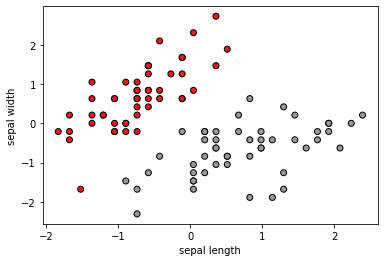

In [51]:
plt.scatter(data_iris_setosa_versicolor[:, 1], 
            data_iris_setosa_versicolor[:, 2], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

```{margin}
Obsérvese que considerando los atributos `Petal.Length` y `Petal.Width` se pueden separar la clase *I. setosa* codificada como $-1$ y la clase *I. versicolor* codificada como $1$ de forma lineal.

```

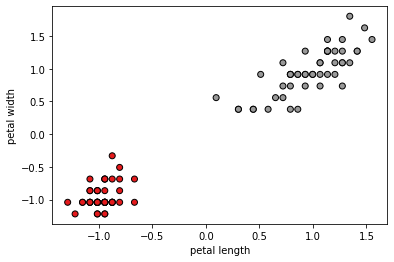

In [52]:
plt.scatter(data_iris_setosa_versicolor[:, 3], 
            data_iris_setosa_versicolor[:, 4], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

**Función objetivo:**

$$\frac{||a||^2_2}{2}$$

**y restricciones:**

$$a^Tx_i - b \leq -1, \quad \forall i=1, \dots, N$$

$$a^Ty_i -b \geq 1, \quad \forall i=1, \dots, M$$

```{margin}

Ver [cvxpy: svm](https://www.cvxpy.org/examples/machine_learning/svm.html)

```

In [53]:
n = 5 #number of variables
a = cp.Variable(n) #optimization variable


In [54]:
fo_cvxpy = 1/2*cp.norm(a[1:n],2)**2 #fo just includes a not intercept

In [55]:
constraints = [data_iris_setosa_versicolor[0:50,:]@a <=-1,
               data_iris_setosa_versicolor[50:100,:]@a >= 1]

In [56]:
obj = cp.Minimize(fo_cvxpy)

In [57]:
prob = cp.Problem(obj, constraints)
print(prob.solve())

0.6190278039214824


In [58]:
print("\nThe optimal value is", prob.value)
print("The optimal a with intercept is")
print(a.value)


The optimal value is 0.6190278039214824
The optimal a with intercept is
[-0.24  0.27 -0.34  0.7   0.75]


Los primeros $50$ renglones pertenecen a la clase $\mathcal{C}_{-1}:$ *I. setosa* y los restantes $50$ renglones pertenecen a la clase $\mathcal{C}_{1}$: *I. versicolor*. Se clasifica de acuerdo al signo de: $a^Tx - b$:

In [59]:
print(np.sign(data_iris_setosa_versicolor[0:50,:]@a.value))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [60]:
print(np.sign(data_iris_setosa_versicolor[50:100,:]@a.value))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


Visualización utilizando únicamente `Sepal.Length` y `Sepal.Width`:

In [61]:
x_min = np.min(data_iris_setosa_versicolor[:,1])
x_max = np.max(data_iris_setosa_versicolor[:,1])
y_min = np.min(data_iris_setosa_versicolor[:,2])
y_max = np.max(data_iris_setosa_versicolor[:,2])
x_plot = np.linspace(x_min, x_max, 100)

In [62]:
y_plot = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0])
y_plot_minus_1 = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0] -1)

y_plot_plus_1 = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0] + 1)

In [63]:
y_plot = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0])
y_plot_minus_1 = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0] -1)

y_plot_plus_1 = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0] + 1)

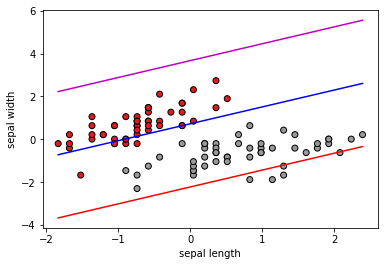

In [64]:
plt.scatter(data_iris_setosa_versicolor[:, 1], 
            data_iris_setosa_versicolor[:, 2], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.plot(x_plot,y_plot,'b',
         x_plot,y_plot_minus_1, 'm',
         x_plot, y_plot_plus_1,'r')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

Visualización utilizando únicamente `Petal.Length` y `Petal.Width`:

In [65]:
x_min = np.min(data_iris_setosa_versicolor[:,3])
x_max = np.max(data_iris_setosa_versicolor[:,3])
y_min = np.min(data_iris_setosa_versicolor[:,4])
y_max = np.max(data_iris_setosa_versicolor[:,4])
x_plot = np.linspace(x_min, x_max, 100)

In [66]:
y_plot = 1/a.value[4]*(-a.value[3]*x_plot + a.value[0])
y_plot_minus_1 = 1/a.value[4]*(-a.value[3]*x_plot + a.value[0] -1)

y_plot_plus_1 = 1/a.value[4]*(-a.value[3]*x_plot + a.value[0] + 1)

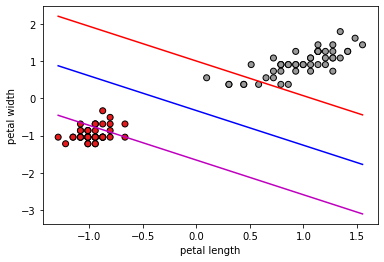

In [67]:
plt.scatter(data_iris_setosa_versicolor[:, 3], 
            data_iris_setosa_versicolor[:, 4], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.plot(x_plot,y_plot,'b',
         x_plot,y_plot_minus_1, 'm',
         x_plot, y_plot_plus_1,'r')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

```{admonition} Ejercicio
:class: tip

Realiza la clasificación anterior para las clases `virginica` y `versicolor`.

```

### Ajustando el modelo de la SVM sólo para dos atributos: `Sepal.Length` y `Sepal.Width`:

In [68]:
data_iris_setosa_versicolor = data_iris[0:100, 0:2].copy()


In [69]:
data_iris_setosa_versicolor = (data_iris_setosa_versicolor-data_iris_setosa_versicolor.mean(axis=0))/data_iris_setosa_versicolor.std(axis=0)

In [70]:
data_iris_setosa_versicolor = np.column_stack((-1*np.ones((m,1)), data_iris_setosa_versicolor))

In [71]:
n = 3 #number of variables
a = cp.Variable(n) #optimization variable


In [72]:
fo_cvxpy = 1/2*cp.norm(a[1:n],2)**2 #fo just includes a not intercept

In [73]:
constraints = [data_iris_setosa_versicolor[0:50,:]@a <=-1,
               data_iris_setosa_versicolor[50:100,:]@a >= 1]

In [74]:
obj = cp.Minimize(fo_cvxpy)

In [75]:
prob = cp.Problem(obj, constraints)
print(prob.solve())

11.273240420474107


In [76]:
print("\nThe optimal value is", prob.value)
print("The optimal a with intercept is")
print(a.value)



The optimal value is 11.273240420474107
The optimal a with intercept is
[-0.93  4.03 -2.51]


In [77]:
print(np.sign(data_iris_setosa_versicolor[0:50,:]@a.value))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [78]:
print(np.sign(data_iris_setosa_versicolor[50:100,:]@a.value))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [79]:
x_min = np.min(data_iris_setosa_versicolor[:,1])
x_max = np.max(data_iris_setosa_versicolor[:,1])
y_min = np.min(data_iris_setosa_versicolor[:,2])
y_max = np.max(data_iris_setosa_versicolor[:,2])
x_plot = np.linspace(x_min, x_max, 100)

In [80]:
y_plot = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0])
y_plot_minus_1 = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0] -1)

y_plot_plus_1 = 1/a.value[2]*(-a.value[1]*x_plot + a.value[0] + 1)

In [81]:
print(a.value)

[-0.93  4.03 -2.51]


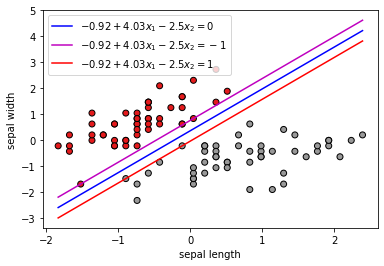

In [82]:
plt.scatter(data_iris_setosa_versicolor[:, 1], 
            data_iris_setosa_versicolor[:, 2], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.plot(x_plot,y_plot,'b',
         x_plot,y_plot_minus_1, 'm',
         x_plot, y_plot_plus_1,'r')
plt.legend(["$-0.92 + 4.03x_1 -2.5x_2=0$",
            "$-0.92 + 4.03x_1 -2.5x_2=-1$",
            "$-0.92 + 4.03x_1 -2.5x_2=1$"])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

```{admonition} Ejercicio
:class: tip

1. Determina para este ajuste los vectores de soporte y márcalos en la gráfica.

2. Realiza el ajuste para los atributos `Petal.Length`, `Petal.Width` y la visualización de los datos con la recta que separa y las rectas que forman al margen.

```

## Problemas de programación lineal

Una gran cantidad de aplicaciones utilizan formulaciones de problemas de programación lineal que involucran igualdades y desigualdades cuya forma **estándar** está dada por:

$$\min c^Tx$$

$$\text{sujeto a:}$$

$$Ax=b$$

$$x \geq 0$$

donde: $A \in \mathbb{R}^{m \times n}$ y se **asume** $m \leq n$ y tiene *rank* completo por renglones y la última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero.

```{admonition} Observación
:class: tip

Obsérvese que la función objetivo $f_o(x) = c^Tx$ y tanto las restricciones de igualdad como desigualdad son funciones lineales.

```

(EJPROBTRANSPORTE)=

### Ejemplo: problema de transporte

La compañía "Brazilian coffee" procesa granos de café en $m$ plantas de café. El café posteriormente es enviado cada semana a $n$ almacenes para su *retail*, distribución y exportación. Supóngase que el costo unitario de envío de la planta $i$ al almacén $j$ es $c_{ij}$. También supóngase que la capacidad de producción en la planta $i$ es $a_i$ y que la demanda en el almacén $j$ es $b_j$. 

Se desea encontrar la cantidad de unidades $x_{ij}$ de café que serán transportadas de la planta $i$ al almacén $j$, $i=1,\dots, m$, $j=1, \dots, n$ que minimice el costo total de envío. 

Este problema es de programación lineal modelado como:


$$\underset{i=1,\dots, m, j=1,\dots, n}{\displaystyle \min_{x_{ij} \in \mathbb{R}}} \sum_{i=1}^m \sum_{j=1}^n c_{ij}x_{ij}$$

$$\text{sujeto a:}$$

$$\displaystyle \sum_{j=1}^n x_{ij} \leq a_i, \quad i=1,\dots, m$$

$$\displaystyle \sum_{i=1}^m x_{ij} = b_j, \quad j=1, \dots, n$$

$$x_{ij} \geq 0 \quad i=1, \dots, m, j= 1, \dots, n.$$

(INTMETPIN)=

## Introducción a los métodos de [puntos interiores](https://en.wikipedia.org/wiki/Interior-point_method)

```{sidebar} Un poco de historia

El desarrollo por Dantzig del [método símplex](https://en.wikipedia.org/wiki/Simplex_algorithm) en los $40$'s marcó el inicio de la era moderna en optimización. Tal método hizo posible que economistas formularan y analizaran modelos grandes en una forma sistemática y eficiente.

Hoy en día continúa siendo uno de los métodos más utilizados para resolver programas lineales. Pertenece a una clase general de algoritmos de optimización con restricciones conocida como [métodos de conjuntos activos](https://en.wikipedia.org/wiki/Active-set_method) en los que la tarea fundamental es determinar cuáles restricciones son activas y cuáles inactivas en la solución. Mantiene estimaciones de conjuntos de índices de restricciones activas e inactivas que son actualizadas y realiza cambios modestos a tales conjuntos en cada paso del algoritmo.

No obstante puede ser ineficiente en problemas lineales "patológicos" (ver [Klee-Minty cube](https://en.wikipedia.org/wiki/Klee%E2%80%93Minty_cube)) pues el tiempo para resolver tales problemas es exponencial respecto al tamaño del problema (medido como el número de variables y la cantidad de almacenamiento para los datos del problema). Para la mayoría de problemas prácticos el método símplex es mucho más eficiente que estos casos "patológicos" pero esto motivó la investigación y desarrollo de nuevos algoritmos con mejor desempeño.

En 1984 Karmakar publicó el [algoritmo](https://en.wikipedia.org/wiki/Karmarkar%27s_algorithm) que lleva su mismo nombre que tiene una complejidad polinomial y en la práctica resultó ser eficiente. Pertenece a la clase de métodos con el nombre de puntos interiores
```

En los $80$'s se descubrió que muchos problemas lineales *large scale* podían ser resueltos eficientemente utilizando formulaciones y algoritmos de programación no lineal y de ecuaciones no lineales. Una característica de tales métodos era que requerían que todas las iteraciones satisfacieran las restricciones de desigualdad de forma **estricta** por lo que se les nombró como **puntos interiores**. A inicios de los $90$'s una subclase de métodos de puntos interiores conocidos con el nombre de **primal-dual** se distinguieron como las metodologías más eficientes en la práctica y probaron ser fuertes compeditores con el método símplex en problemas *large scale*.


Cada iteración en el esquema de puntos interiores es costosa de calcular y realiza avance significativo a la solución en contraste con el método símplex que requiere un gran número de iteraciones no costosas. 

El método símplex geométricamente trabaja en la frontera del conjunto factible probando una secuencia de vértices hasta encontrar el óptimo:

<img src="https://dl.dropboxusercontent.com/s/dpfbx6k1yn9a397/Simplex_Linear_Program_Example.png?dl=0" heigth="600" width="600">

Los métodos de puntos interiores se aproximan a la frontera del conjunto de factibilidad únicamente en el límite. Pueden aproximarse por el interior o exterior del conjunto de factibilidad pero nunca caen en la frontera del mismo:

<img src="https://dl.dropboxusercontent.com/s/66gydyfpdjyqql6/Interior_Point_Method_Linear_Program_Example.png?dl=0" heigth="600" width="600">

### Introducción al método primal-dual

Considérese el problema de programación lineal en su forma estándar:

$$\min c^Tx$$

$$\text{sujeto a:}$$

$$Ax=b$$

$$x \geq 0$$

donde: $A \in \mathbb{R}^{m \times n}$ y se **asume** $m \leq n$ y tiene *rank* completo por renglones y la última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero. Por el desarrollo en {ref}`introducción a CIEO <INTCIEO>`, las soluciones del problema anterior están caracterizadas por las condiciones KKT:

$$A^T \nu + \lambda - c = 0$$

$$Ax = b$$

$$x_i \lambda_i = 0, i=1, \dots, n$$

$$x \geq 0$$

$$\lambda \geq 0$$

donde: las últimas dos desigualdades se refieren que todas las componentes de los vectores son mayores o iguales a cero.

Los métodos de la clase primal-dual encuentran soluciones $(x^*, \nu^*, \lambda^*)$ con variantes del método de Newton para las igualdades anteriores modificando las direcciones de búsqueda y tamaños de paso de modo que las desigualdades se satisfagan de forma **estricta** en cada iteración.

La idea de los métodos de la clase primal-dual es reescribir las condiciones KKT de optimalidad anteriores mediante una función $F: \mathbb{R}^{2n + m} \rightarrow \mathbb{R}^{2n+m}$ dada por:

$$F(x, \nu, \lambda ) = \left [ \begin{array}{c} A^T \nu + \lambda -c \\ Ax - b \\ X \Lambda e \end{array} \right ]$$


y resolver la ecuación **no lineal** $F(x, \nu, \lambda )=0$ para $(x, \lambda) \geq 0$, donde: $X = \text{diag}(x_1, \dots, x_n)$, $\Lambda = \text{diag}(\lambda_1, \dots, \lambda_n)$ y $e$ es un vector de $1$'s en $\mathbb{R}^n$.

Los métodos de la clase primal-dual producen iteraciones $(x^{(k)}, \nu^{(k)}, \lambda^{(k)})$ tales que $x^{(k)} > 0$ y $\lambda^{(k)} > 0$, por esto tales métodos son considerados como puntos interiores. 

## Software para resolver problemas CIEO

Como ejemplo de funciones, paquetes y sistemas para resolver problemas tipo *constrained inequality and equality optimization* se encuentran:

* [scipy-optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html), [scipy-optimize-linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy-optimize-linprog), [pulp](https://github.com/coin-or/pulp)

* [cvxpy](https://www.cvxpy.org/), [cvx](http://cvxr.com/cvx/), [cvxr](https://cvxr.rbind.io/), [Convex](https://github.com/jump-dev/Convex.jl)

* [nlopt](https://github.com/stevengj/nlopt)

* [JuMP](https://github.com/jump-dev/JuMP.jl), [Optim](https://github.com/JuliaNLSolvers/Optim.jl/) cuyo *paper* está en [liga](https://joss.theoj.org/papers/10.21105/joss.00615)

* [AMPL](https://ampl.com/), [AMPL Python API](https://ampl.com/api/nightly/python/), [AMPL R API](https://ampl.com/api/nightly/R/), [AMPL MATLAB API](https://ampl.com/api/nightly/matlab/)

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Dennis, R. B. Schnabel, Numerical Methods for Unconstrained Optimization and Nonlinear Equations, SIAM, 1996.

3. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.

4. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.